In [1]:
import pandas as pd
import numpy as np

### 1.0 Read data (inflation2.csv) into a dataframe calls df

In [2]:
df = pd.read_csv('inflation2.csv', index_col=0)

df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1914,2.0,1.0,1.0,0.0,2.1,1.0,1.0,3.0,2.0,1.0,1.0,1.0
1915,1.0,1.0,0.0,2.0,2.0,2.0,1.0,-1.0,-1.0,1.0,1.0,2.0
1916,3.0,4.0,6.1,6.0,5.9,6.9,6.9,7.9,9.9,10.8,11.7,12.6
1917,12.5,15.4,14.3,18.9,19.6,20.4,18.5,19.3,19.8,19.5,17.4,18.1
1918,19.7,17.5,16.7,12.7,13.3,13.1,18.0,18.5,18.0,18.5,20.7,20.4


### 2. Create a numpy array from the dataframe df and call it data

In [95]:
data = df.to_numpy()

data[:3]

array([[ 2. ,  1. ,  1. ,  0. ,  2.1,  1. ,  1. ,  3. ,  2. ,  1. ,  1. ,
         1. ],
       [ 1. ,  1. ,  0. ,  2. ,  2. ,  2. ,  1. , -1. , -1. ,  1. ,  1. ,
         2. ],
       [ 3. ,  4. ,  6.1,  6. ,  5.9,  6.9,  6.9,  7.9,  9.9, 10.8, 11.7,
        12.6]])

### 3. Reshape the data so that it's a one dimensional array (a sequence of all inflation numbers) and call it data 

In [96]:
# insert your code here
data=data.reshape(data.shape[0]*data.shape[1])

In [97]:
data.shape

(1308,)

### 4. Create sequences of 11 inflation figures. These are observations with 10 time_steps and one y. Be sure to use a sliding window, so that your first sequence is 0-9, and your second is 1-10, etc.

In [98]:
sequence_length = 11
def create_sequences(data, seq_length):
    obs = []
    print(obs)    
    for i in range(len(data)-seq_length):
        obs.append(data[i:(i+seq_length)])
    return np.array(obs)


In [99]:
data = create_sequences(data, 11)
data.shape

[]


(1297, 11)

### 5. Extract the y column from the data

In [65]:
# insert your code here
y = data[:,-1]

In [66]:
y.shape

(1297,)

### 6. Extract the first 10 inflation numbers from each observation and store this as a 2d array called X.

In [69]:
# insert your code here
X = data[:,:-1]

In [70]:
X.shape

(1297, 10)

### 7. Split the data into training and test sets. Use 80% of the data for training and 20% for testing. Call the training set X_train and y_train and the test set X_test and y_test.

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
y_train.shape

(1037,)

In [73]:
y_test.shape

(260,)

In [74]:
X_train.shape

(1037, 10)

In [75]:
X_test.shape

(260, 10)

### 8. Reshape your y_train and y_test data into a 2d array

In [81]:
# insert your code here
y_train = y_train.reshape(-1,1)

In [82]:
y_train.shape

(1037, 1)

In [83]:
# insert your code here
y_test = y_test.reshape(-1,1)

In [84]:
y_test.shape

(260, 1)

### 9. Normalize the data

In [85]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_train)


y_scaler = MinMaxScaler(feature_range=(0, 1)) # I don't necessarily need to rescale the y values, but I may test doing this in the future
_ = y_scaler.fit(y_train)

### 10. Create the RNN model

In [86]:
from keras import Sequential
from keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(20, input_shape=(10,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [87]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 20)                440       
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


### 11. Fit the model to the training data

In [88]:
from tensorflow.keras import callbacks

call_back = callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(
    X_train, 
    y_train, 
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[call_back]
)


Epoch 1/50
33/33 [==============================] - 2s 18ms/step - loss: 36.7089 - val_loss: 36.7347
Epoch 2/50
33/33 [==============================] - 0s 4ms/step - loss: 26.5500 - val_loss: 28.7194
Epoch 3/50
33/33 [==============================] - 0s 4ms/step - loss: 19.9961 - val_loss: 21.7843
Epoch 4/50
33/33 [==============================] - 0s 4ms/step - loss: 14.9430 - val_loss: 17.1472
Epoch 5/50
33/33 [==============================] - 0s 4ms/step - loss: 12.1211 - val_loss: 14.6008
Epoch 6/50
33/33 [==============================] - 0s 4ms/step - loss: 10.3381 - val_loss: 12.8827
Epoch 7/50
33/33 [==============================] - 0s 4ms/step - loss: 9.0758 - val_loss: 11.4865
Epoch 8/50
33/33 [==============================] - 0s 4ms/step - loss: 8.0953 - val_loss: 10.4633
Epoch 9/50
33/33 [==============================] - 0s 4ms/step - loss: 7.3183 - val_loss: 9.5148
Epoch 10/50
33/33 [==============================] - 0s 4ms/step - loss: 6.6058 - val_loss: 8.5792
Epoc

### 12. Evaluate the model performance using the test data

In [89]:
y_pred = model.predict(X_test)

9/9 [==============================] - 0s 8ms/step


In [90]:
results = pd.DataFrame()

results['actual'] = y_test.flatten()
results['predicted'] = y_pred.flatten()
results['residual'] = results['actual'] - results['predicted']

results

,actual,predicted,residual
0,1.3,1.048334,0.251666
1,5.5,4.312280,1.187720
2,4.9,4.695041,0.204959
3,3.4,3.661446,-0.261446
4,3.6,3.281224,0.318776
...,...,...,...
255,5.2,4.896451,0.303549
256,3.6,3.478248,0.121752
257,-2.1,-0.642136,-1.457864
258,-1.0,-1.090462,0.090462


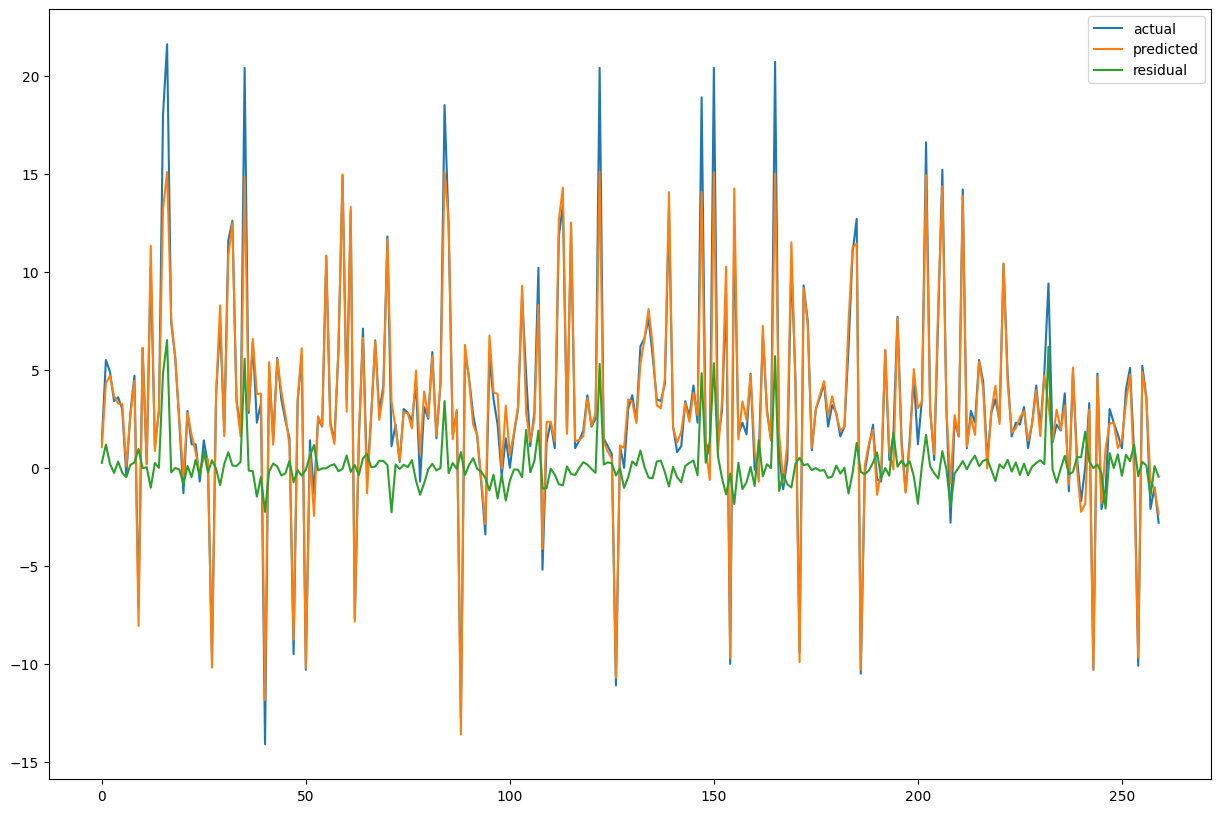

In [91]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,10))

plt.plot(results['actual'], label = 'actual')
plt.plot(results['predicted'], label = 'predicted')
plt.plot(results['residual'], label = 'residual')

plt.legend()

plt.show()